<a href="https://colab.research.google.com/github/stephkariuki19/colab-notebooks/blob/main/Copy_of_CLASS_EXE_CLASSIFICATION_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd


df = pd.read_csv('new_filtered_data2.csv')

In [ ]:
df.head()

In [ ]:
unique_names = df['Name'].unique()

# Print or display the unique values
print(unique_names)

In [ ]:

code_mapping = {code: idx for idx, code in enumerate(df['Code'].unique())}

# Map the string values to numerical codes
df['Code'] = df['Code'].map(code_mapping)

largest_value = df['Code'].max()

print("The largest value in the 'Code' column is:", largest_value)
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extract relevant date features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


df['day_of_week'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter

# Drop the original 'date' column
df = df.drop('Date', axis=1)

 # view the loaded the data
df.head()


In [ ]:
df = df.drop('date', axis=1)

df.head()

In [ ]:
print(df.dtypes)

In [ ]:


df['Change'] = pd.to_numeric(df['Change'], errors='coerce')


df['DecisionLabel'] = (df['Change'] > 0).astype(int)
df.head()


In [ ]:
columns_to_replace = ['Volume', 'Change', 'Change%']


df[columns_to_replace] = df[columns_to_replace].replace('-', '0', regex=True)
df[columns_to_replace] = df[columns_to_replace].replace(',', '', regex=True)
df[columns_to_replace] = df[columns_to_replace].replace('%', '', regex=True)

# Convert the columns to numeric type
df[columns_to_replace] = df[columns_to_replace].astype(float)


for col in columns_to_replace:
    non_numeric_values = df[col].loc[~df[col].apply(lambda x: isinstance(x, (int, float)))].unique()
    if non_numeric_values.size > 0:
        print(f"Non-numeric values in column '{col}': {non_numeric_values}")
df.head()

In [ ]:
columns_to_replace = ['Volume', 'Change', 'Change%']

# Remove '-' with 0 and remove commas in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace(['-', ','], '0', regex=True)

# Convert the columns to numeric type
df[columns_to_replace] = df[columns_to_replace].astype(float)


df['Change'].fillna(0, inplace=True)

# Check for any remaining non-numeric values in these columns
for col in columns_to_replace:
    non_numeric_values = df[col].loc[~df[col].apply(lambda x: isinstance(x, (int, float)))].unique()
    if non_numeric_values.size > 0:
        print(f"Non-numeric values in column '{col}': {non_numeric_values}")
df.head()


In [ ]:
#Putting Feature Variable to X and Target variable to y.
#feature variables

columns_to_drop = ['DecisionLabel','Name','Adjusted Price','Change%']

init_X_feature = df.drop(columns=columns_to_drop, axis=1).values

# Target variable
init_y_target = df['DecisionLabel'].values

# Filtering rows where 'Code' column equals 0
zero_code_rows = df[df['Code'] == 7]

# Creating X_feature and y_target from the filtered data
X_feature = zero_code_rows.drop(columns=columns_to_drop, axis=1).values
y_target = zero_code_rows['DecisionLabel'].values


# # Creating X_feature and y_target from all data
# X_feature = init_X_feature
# y_target = init_y_target

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((71, 14), (31, 14))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.7419354838709677
Precision: 0.7433380084151472
Recall: 0.7419354838709677
Confusion Matrix:
[[17  2]
 [ 6  6]]


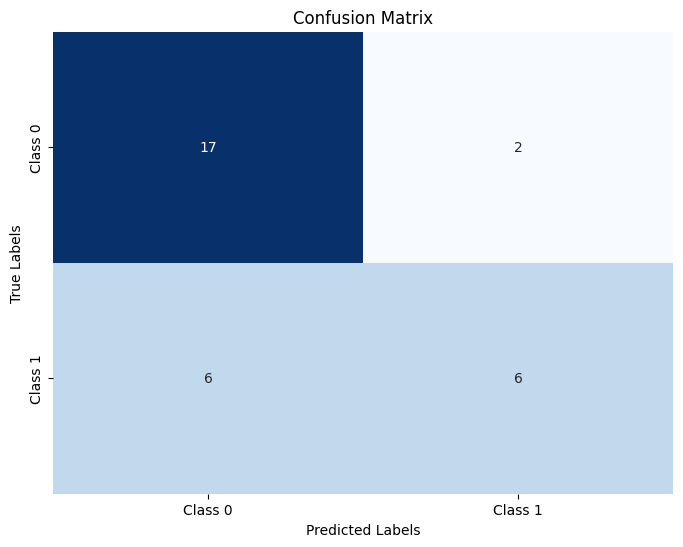

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Adding labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])

plt.show()

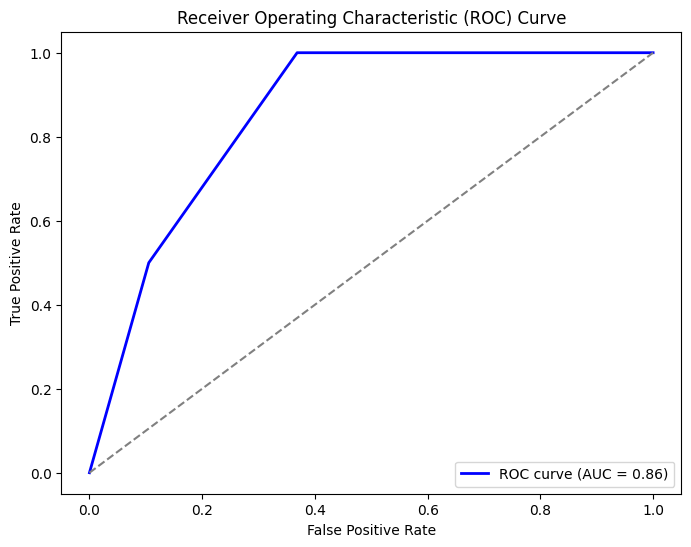

AUC score: 0.86


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Make predictions on the test set
y_pred_prob = knn_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC score: {roc_auc:.2f}")
